score Scikit learn:  0.8484848484848485


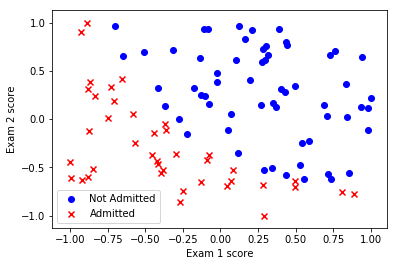

In [2]:
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel


min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
df = pd.read_csv("data.csv", header=0)


df.columns = ["grade1","grade2","label"]

x = df["label"].map(lambda x: float(x.rstrip(';')))


X = df[["grade1","grade2"]]
X = np.array(X)
X = min_max_scaler.fit_transform(X)
Y = df["label"].map(lambda x: float(x.rstrip(';')))
Y = np.array(Y)



X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

 
clf = LogisticRegression()
clf.fit(X_train,Y_train)
print ('score Scikit learn: ', clf.score(X_test,Y_test))


pos = where(Y == 1)
neg = where(Y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

def Sigmoid(z):
    G_of_Z = float(1.0 / float((1.0 + math.exp(-1.0*z))))
    return G_of_Z 

def Hypothesis(theta, x):
    z = 0
    for i in xrange(len(theta)):
        z += x[i]*theta[i]
    return Sigmoid(z)

def Cost_Function(X,Y,theta,m):
    sumOfErrors = 0
    for i in xrange(m):
        xi = X[i]
        hi = Hypothesis(theta,xi)
        if Y[i] == 1:
            error = Y[i] * math.log(hi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-hi)
        sumOfErrors += error
    const = -1/m
    J = const * sumOfErrors
    print ('cost is ', J )
    return J


def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
    sumErrors = 0
    for i in xrange(m):
        xi = X[i]
        xij = xi[j]
        hi = Hypothesis(theta,X[i])
        error = (hi - Y[i])*xij
        sumErrors += error
    m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sumErrors
    return J


def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = []
    constant = alpha/m
    for j in xrange(len(theta)):
        CFDerivative = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
        new_theta_value = theta[j] - CFDerivative
        new_theta.append(new_theta_value)
    return new_theta


def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in xrange(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            
            Cost_Function(X,Y,theta,m)
            print ('theta ', theta)	
            print ('cost is ', Cost_Function(X,Y,theta,m))
            Declare_Winner(theta)


def Declare_Winner(theta):
    score = 0
    winner = ""
   
    scikit_score = clf.score(X_test,Y_test)
    length = len(X_test)
    for i in xrange(length):
        prediction = round(Hypothesis(X_test[i],theta))
        answer = Y_test[i]
        if prediction == answer:
            score += 1
   
    my_score = float(score) / float(length)
    if my_score > scikit_score:
        print ('You won!')
    else:
        print ('Your score: ', my_score)
        print ('Scikits score: ', scikit_score )


initial_theta = [0,0]
alpha = 0.1
iterations = 1000

